# Project: Investigate a Dataset - TMDb Movie Data

## Analysis by Erin Miller

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

We will be exploring data sourced from The Movie Database (TMDb). This dataset includes information about 10,000+ movies. The columns in this dataset are id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj. Most columns are self-expolanatory. Budget_adj and revenue_adj show the budget and revenue adjusted for inflation using 2010 dollars. 

### Questions for Analysis

The questions I would like to answer are as follows:
* What is the vote average over the years?
* Which movies are the most popular?
* Which movies had the highest budgets?

Before we do anything, we need to import necessary libraries and set inline plotting.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Load the data from the csv into a pandas dataframe and check the first few rows.

In [26]:
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Some of the columns have multiple values separated by a pipe (|). We may want to remove those later, but it may not matter. 

Now, let's investigate the shape of the data.

In [27]:
movie_df.shape

(10866, 21)

A result of (10866, 21) means we have 10,866 rows and 21 columns.

Are any of those 10,866 rows duplicates? Let's find out!

In [28]:
movie_df.duplicated().sum()

1

We have one duplicate record. If we had many duplicates (hundreds, maybe), we would need to research them to find out why we have so many duplicates, but in this case we will simply drop it now so we can continue exploring the data.

In [29]:
movie_df.drop_duplicates(inplace = True)

Check the shape of the data one more time to make sure our duplicate record was dropped.

In [30]:
movie_df.shape

(10865, 21)

We now have 10,865 records and 21 columns as expected. We can now investigate some high level information about the data.

In [31]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

There are some null values in the following fields: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies. We should keep this in mind as we continue to explore the data.

Now, let's see some basic statistics of our dataset.

In [32]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see that the mean popularity is 0.646446, so 64.64%. The mean vote average is 5.975012. Budget_adj has some 0 values that we will need to handle.

Visualize the data:

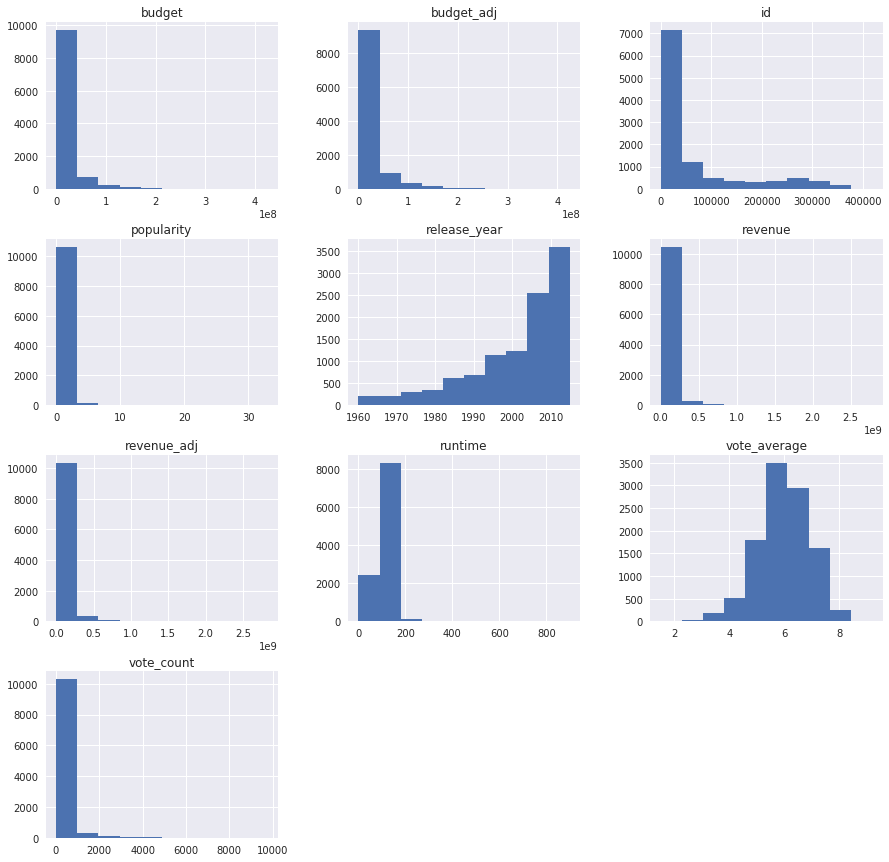

In [33]:
movie_df.hist(figsize = (15, 15));

A few things stand out in the above visualizations. First, far more movies were released per year in recent years than in the earlier years of the dataset. Second, most vote averages are in the 5-6 range.


### Data Cleaning
 

First, we need to drop any columns we will not be needing for the analysis. Based on the questions we will be exploring, we can drop id, imdb_id, budget, revenue, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, and revenue_adj.

Dropping the columns above should leave us with popularity, original_title, vote_average, release_year, and budget_adj.

In [34]:
movie_df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'revenue_adj'], axis = 1, inplace = True)

In [35]:
movie_df.head()

,popularity,original_title,vote_average,release_year,budget_adj
0,32.985763,Jurassic World,6.5,2015,1.379999e+08
1,28.419936,Mad Max: Fury Road,7.1,2015,1.379999e+08
2,13.112507,Insurgent,6.3,2015,1.012000e+08
3,11.173104,Star Wars: The Force Awakens,7.5,2015,1.839999e+08
4,9.335014,Furious 7,7.3,2015,1.747999e+08


Great! Let's see how many columns have null values that we need to clean up.

In [36]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 509.3+ KB


No null values! Great!

The datatypes for our columns all look okay, so no need to clean those.

The last thing we need to clean are the 0 values in budget_adj. I am going to replace those with the mean adjusted budget. This might skew the data, but I would rather skew it with the mean than with a 0. 

In [37]:
movie_df['budget_adj'].replace(0,(movie_df['budget_adj'].mean()),inplace = True)

In [38]:
movie_df.describe()

,popularity,vote_average,release_year,budget_adj
count,10865.000000,10865.000000,10865.000000,1.086500e+04
mean,0.646446,5.975012,2001.321859,2.675046e+07
std,1.000231,0.935138,12.813260,3.051007e+07
min,0.000065,1.500000,1960.000000,9.210911e-01
25%,0.207575,5.400000,1995.000000,1.754989e+07
50%,0.383831,6.000000,2006.000000,1.754989e+07
75%,0.713857,6.600000,2011.000000,2.085325e+07
max,32.985763,9.200000,2015.000000,4.250000e+08


That appears to have worked.

I am happy with the data now, so let's go exploring.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the vote average over the years?

First, let's use .describe() to see some basic statistics of the release year and vote average.

In [39]:
movie_df[["release_year", "vote_average"]].describe()

,release_year,vote_average
count,10865.000000,10865.000000
mean,2001.321859,5.975012
std,12.813260,0.935138
min,1960.000000,1.500000
25%,1995.000000,5.400000
50%,2006.000000,6.000000
75%,2011.000000,6.600000
max,2015.000000,9.200000


Our release years range from 1960-2015, the median release year is 2006, and the mean release year is 2001.321859.

Our vote average ranges from 1.5-9.2, the median is 6, and the mean is 5.975012.

Let's see a histogram of this. 

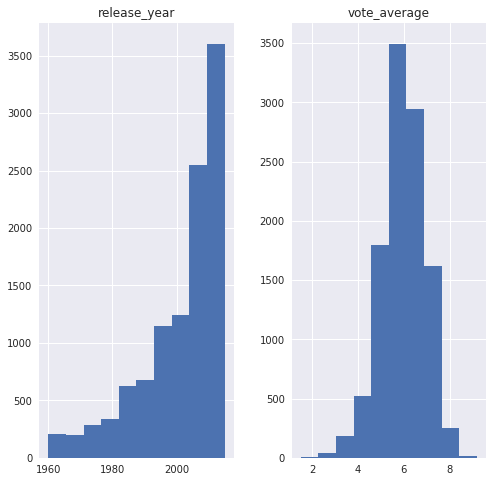

In [40]:
movie_df[["release_year", "vote_average"]].hist(figsize = (8, 8));

Release_year is skewed heavily to the left, which means we have far more movies being released in more recent years. Vote_average has a pretty nice normal distribution.

Let's see what a line plot looks like.

In [41]:
year_vote_mean = movie_df.groupby('release_year')['vote_average'].mean()

Text(0,0.5,'Vote Average')

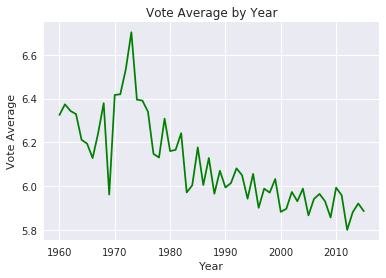

In [42]:
plt.plot(year_vote_mean, color = 'green')
plt.title("Vote Average by Year")
plt.xlabel("Year")
plt.ylabel("Vote Average")

Wow! The mid 1970s saw some very high average votes, while vote averages tended to decline over the years. The early 2010s saw the lowest vote averages.

In [43]:
year_vote_mean.min()

5.7998299319727886

In [44]:
year_vote_mean.max()

6.7036363636363632

The lowest vote average for a year is about 5.8 while the highest vote average for a year is about 6.7. 

### Research Question 2: Which movies are the most popular?

First, let's see some statistics and also see which movies are most and least popular

In [45]:
movie_df[["popularity"]].describe()

,popularity
count,10865.000000
mean,0.646446
std,1.000231
min,0.000065
25%,0.207575
50%,0.383831
75%,0.713857
max,32.985763


In [46]:
movie_df.loc[movie_df['popularity'].idxmin()]

popularity                        6.5e-05
original_title    North and South, Book I
vote_average                            6
release_year                         1985
budget_adj                    1.75499e+07
Name: 6181, dtype: object

Ouch. I can't say I'm surprised it's North and South, Book I... Let's check the max.

In [47]:
movie_df.loc[movie_df['popularity'].idxmax()]

popularity               32.9858
original_title    Jurassic World
vote_average                 6.5
release_year                2015
budget_adj              1.38e+08
Name: 0, dtype: object

Interesting! I was expecting Star Wars. I wonder if Star Wars will make it into the top 10. Let's find out!

I am going to create a function for my top 10 plot because I think I am going to use this plot multiple times. With a function, I can simply change my variables without recreating the whole plot every time. 

In [48]:
movies_popularity = movie_df[['original_title', 'popularity']]

In [72]:
sns.set(rc={'figure.figsize':(10,10)})

def TopPlot(df,xVal,yVal, top=10):
    data=df[[xVal,yVal]].sort_values(by=yVal, ascending = False).head(top)
    
    df_plot=sns.barplot(data=data,y=xVal, x=yVal, orient='h');
    
    xVal=xVal.replace("_", " ").title()
    yVal=yVal.replace("_", " ").title()
    
    df_plot.set(ylabel=xVal, xlabel=yVal, title = f'Top {top} {xVal} by {yVal}');

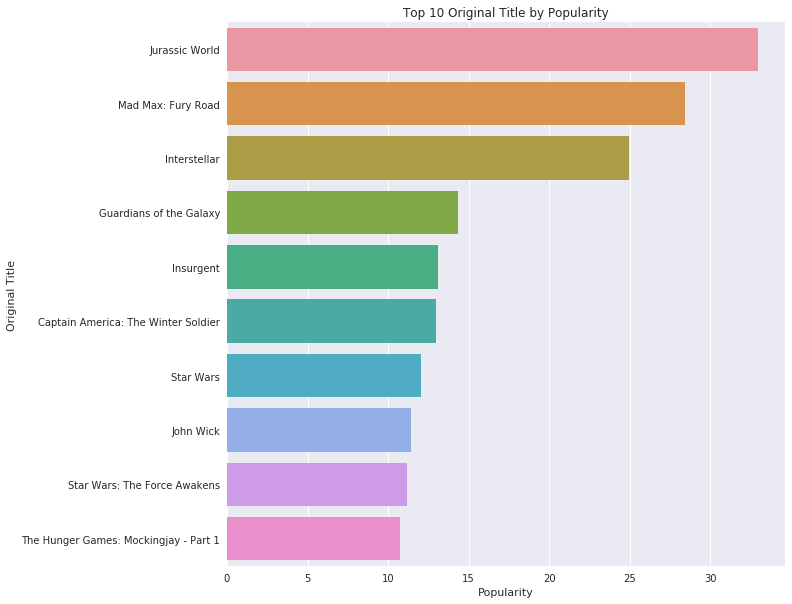

In [73]:
TopPlot(movies_popularity, 'original_title', 'popularity')

There's Star Wars coming in at number 7! I am a little surprised by the top 5 movies. I was not expecting to see those titles. 

### Research Question 3: Which movies have the highest budgets?

Let's explore which movies have the highest budgets. We are going to use budget_adj in order to adjust for inflation.

This question is quite similar to the previous question, so we will approach it the same way by seeing some statistics and checking the minimum and maximum records. We will then plot the top 10 movies by adjusted budget.

In [50]:
movie_df[["budget_adj"]].describe()

,budget_adj
count,1.086500e+04
mean,2.675046e+07
std,3.051007e+07
min,9.210911e-01
25%,1.754989e+07
50%,1.754989e+07
75%,2.085325e+07
max,4.250000e+08


In [51]:
movie_df.loc[movie_df['budget_adj'].idxmin()]

popularity           0.177102
original_title    Fear Clinic
vote_average              4.1
release_year             2014
budget_adj           0.921091
Name: 1151, dtype: object

Budget_adj is in millions, so Fear Clinic had an adjusted budget of $921,091. It's quite low in popularity as well.

In [52]:
movie_df.loc[movie_df['budget_adj'].idxmax()]

popularity                  0.25054
original_title    The Warrior's Way
vote_average                    6.4
release_year                   2010
budget_adj                 4.25e+08
Name: 2244, dtype: object

Woah! The Warrior's Way had a budget of over $42 million!

Moving on, let's see which movies come out on top.

Using my previously created top movies plot function:

In [75]:
movies_budget_adj = movie_df[['original_title', 'budget_adj']]

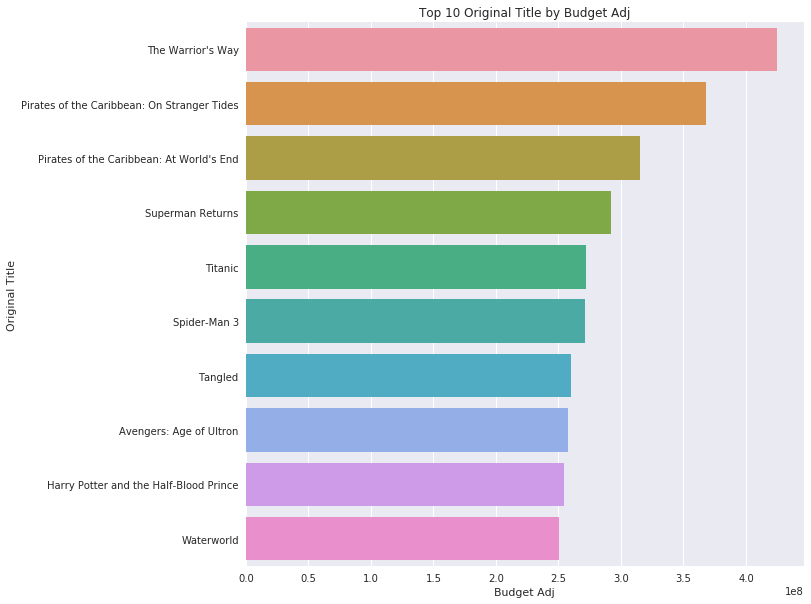

In [76]:
TopPlot(movies_budget_adj, 'original_title', 'budget_adj')

We knew The Warrior's Way would show up at the top, but seeing an animated movie like Tangled in the top 10 is surprising. 

<a id='conclusions'></a>
## Conclusions

Interestingly, none of the highest budget movies were in the top 10 most popular. Having a big budget doesn't always mean you'll get an incredibly popular movie! 

It was also interesting to see vote averages declining over the years. The spike in the 1970s would be great to explore in another project.

### Limitation

While cleaning the data, I replaced the $0 budget_adj values with the mean budget_adj. This did not affect my analysis of the top 10 highest budget movies, but it may skew further analysis by dumping a large number of records right in the m

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0